# Simulated Annealing



1.   Hamiltonian Cycle (Travelling Salesman)
2.   Function Optimisation

## Hamiltonian Cycle (Travelling Salesman)

Use a simulated annealing algorithm to determine the shortest path between n vertices, while only going to each vertex once. The algorithm takes a set of vertex locations,  generates a new path by swapping two edges in the tour,

The algorithm is as follows:
1.   Declare vertex locations.
2.   Declare system parameters: min/max temp, number of cooling iterations, max size of state change, number of simulations. Calculate suitable min/max temperature based on sample path lengths of vertex edges.
4. Generate random tour through vertices. Set to current_state.
5. Generate new_state = current_state with 2 swapped edges.
6. Calculate distances of current_state and new_state distances.
7. If distances: new_state > current_state, then current_state = next_state, else use probability function to randomly choose between current and next state, depending on difference of tour distance and the current temperature.
8. if current_state or next_state > best_state, then best_state = current_state or next_state.
9. Decrement temperature.

In [1]:
import random
import numpy as np

def factorial(n):
  product = 1
  while n>1:
    product*=n
    n-=1
  return product


class SingleTour:

  def __init__(self, vertices):
    self.vertices = vertices
    self.tour = [] # array of vertex locations

  def generate_random_tour(self):
    self.tour = self.vertices.copy()
    random.shuffle(self.tour)

  def get_energy(self):
    distance = 0
    for i in range(len(self.tour)):
      distance += self.get_node_distance(self.tour[i], self.tour[(i+1) % len(self.tour)])
    return distance

  def set_tour(self, tour):
      self.tour.extend(tour)

  def swap(self, index1, index2):
      self.tour[index1], self.tour[index2] = self.tour[index2], self.tour[index1]

  def generate_random_new_state(self):
        new_state = SingleTour(self.vertices)
        num_swaps = random.choice(range(max(1,int(len(self.vertices)/10))))
        new_state.set_tour(self.tour)
        for swap_i in range(num_swaps):
          index1, index2 = random.sample(range(len(new_state.tour)), 2)
          new_state.swap(index1, index2)
        if new_state.tour == self.tour:
          new_state = SingleTour(self.vertices)
          new_state.set_tour(self.tour)
          index1, index2 = random.sample(range(len(new_state.tour)), 2)
          new_state.swap(index1, index2)
        return new_state

  @staticmethod            
  def get_node_distance(actual_location, next_location):
    distance = 0
    for dimension in range(len(actual_location)):
      distance += (next_location[dimension] - actual_location[dimension])**2
    return np.sqrt(distance)


class SimAnnealing_Hamiltomnian_test:

  def __init__(self, vertices, min_temp, max_temp, cooling_steps, num_simulations):
    self.vertices = vertices
    self.min_temp = min_temp
    self.max_temp = max_temp
    self.cooling_rate = ( min_temp / max_temp)**(1/cooling_steps)
    self.current_state = SingleTour(vertices)
    self.best_state = None
    self.vertices = vertices
    self.num_simulations = num_simulations

  def run(self ):
    simulations = []
    for sim_num in range(self.num_simulations):
      print(f"Running simulation: {sim_num}")
      # Generate starting tour
      self.current_state.generate_random_tour()
      self.best_state = self.current_state
      #print(f"Initialising with tour of length {round(self.current_state.get_energy(),2)}")

      temp = self.max_temp
      while temp > min_temp:
        # Generate new_state
        new_state = self.current_state.generate_random_new_state()

        # Calculate energies
        current_energy, new_energy = self.current_state.get_energy(), new_state.get_energy()

        # Accept new state depending on new_energy and temperature: f(actual, next, temp)
        if random.random() < self.accept_state(current_energy, new_energy, temp):
          self.current_state = new_state

        # set new state if better than present best state
        if new_energy < self.best_state.get_energy():
          self.best_state = new_state

        # decerement temp
        temp *= self.cooling_rate
      
      # Append simulation to dict
      simulations.append([self.best_state.tour, self.best_state.get_energy()])

    simulations = np.asarray(simulations, dtype=object)
    best_tour, best_distance = simulations[simulations[:,1].argmin()]
    self.best_state = best_tour
    return best_tour, best_distance

  @staticmethod
  def accept_state(current_energy, new_energy, temp):
    if new_energy < current_energy:
      return 1
    else:
      prob_calc = np.exp( -(new_energy - current_energy) / temp )
      return prob_calc

  def plot_solution(self):
      import matplotlib.pyplot as plt
      xs = []
      ys = []
      zs = []

      tour = self.best_state
      tour.append(tour[0])

      for city in tour:
          xs.append(city[0])
          ys.append(city[1])
          zs.append(city[2])

      plt.figure(figsize = (16,9))
      ax = plt.axes(projection="3d")
      ax.plot3D(xs, ys, zs, 'gray')
      ax.scatter3D(xs, ys, zs, cmap='hsv');

      plt.show()

In [2]:
# Define vertices
dimensions = 3
num_vertices = 12

# define algorithm parameters
cooling_steps = 5E3
num_simulations = 5

In [3]:
#set vertex locations
vertex_locations = np.around(np.random.rand(num_vertices, dimensions)*10,2).tolist()

# Sample random nodes and calculate typical node distances to determine min and max temperature
distances = []
for i in range(min(factorial(num_vertices), 100000)):
  node1, node2 = random.sample(vertex_locations, 2)
  distances.append(SingleTour.get_node_distance(node1, node2))
distances = np.asarray(distances)

min_temp, max_temp = distances.min()/2, distances.max()*5
vertex_locations

[[0.62, 3.25, 7.08],
 [7.96, 7.15, 8.58],
 [2.85, 7.52, 1.97],
 [2.71, 0.15, 0.7],
 [5.93, 3.86, 6.58],
 [4.09, 5.76, 2.28],
 [0.42, 8.64, 7.96],
 [7.73, 7.05, 9.21],
 [6.28, 0.3, 9.2],
 [1.99, 4.21, 7.52],
 [6.97, 9.04, 5.77],
 [5.19, 6.36, 6.93]]

Running simulation: 0
Running simulation: 1
Running simulation: 2
Running simulation: 3
Running simulation: 4

The best path is:
[2.71, 0.15, 0.7]
[4.09, 5.76, 2.28]
[2.85, 7.52, 1.97]
[0.42, 8.64, 7.96]
[6.97, 9.04, 5.77]
[7.96, 7.15, 8.58]
[7.73, 7.05, 9.21]
[5.19, 6.36, 6.93]
[5.93, 3.86, 6.58]
[6.28, 0.3, 9.2]
[1.99, 4.21, 7.52]
[0.62, 3.25, 7.08]

The best path has total distance of: 51.56


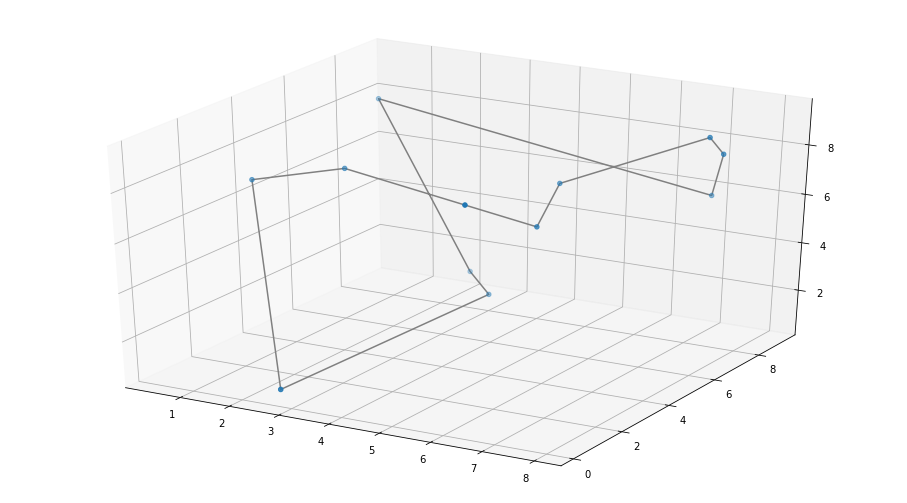

In [4]:
st = SimAnnealing_Hamiltomnian_test(vertex_locations, min_temp, max_temp, cooling_steps, num_simulations)
best_path, total_distance = st.run()
print(f"\nThe best path is:")
for node in best_path:
  print(node)
print()
print(f"The best path has total distance of: {round(total_distance,2)}")
st.plot_solution()

## Function Optimisation

Simulate a simple example of a classical version of the quantum annealer at Fujitsu. The algorithm takes a function with n variables and bounds for values of those variables. The process follows a standard annealing maximisation algorithm, though takes into account an initial state of the system. 
The initial function to optimise is a baseline function corresponding to some systemic state of the annealer, and over time the desired optimisation function is introduced and becomes the dominant function to optimise.

The algorithm is as follows:


1.   Declare function to maximise.
2.   Declare system parameters: min/max temp, number of cooling iterations, max size of state change, number of simulations.
3. Make new function: f(x, temp) = opt_func(X)/temp + system_func(X)*temp
4. Generate random start location. Set to current_state.
5. Generate new_state = current_state + step.
6. Calculate value of f(current_state) and f(new_state).
7. If f(new_state) > f(current_state), then current_state = next_state, else use probability function to randomly choose between current and next state, depending on difference and current temperature.
8. if current_state or next_state > best_state, then best_state = current_state or next_state.
9. Decrement temperature



In [5]:
from random import random
import numpy as np

variables = 2
system_paras = np.random.uniform(low = 0, high = 1, size = variables)

def optimise_function(X):
  scale = 1.5
  std = 1
  freq1, freq2 = 5,3
  f = np.sin(freq1*X[0]) + np.sin(freq2*X[1]) + np.exp(-( (X[0])**2 + (X[1]-1.)**2 )/std)/scale
  return f

In [6]:
class SimulatedAnnealing_function:

  def __init__(self, optimise_function, min_max_coordinates, min_temp, max_temp, cooling_steps, step_size):
    # Sytem Parameters
    self.min_max_coordinates = min_max_coordinates
    self.min_temp = min_temp
    self.max_temp = max_temp
    self.step_size = step_size
    self.cooling_rate = (min_temp / max_temp )**(1/cooling_steps)
    self.variable_ranges = np.array([ (i[1] - i[0]) for i in min_max_coordinates ])
    self.optimise_function = optimise_function
    self.system_parameters = np.random.uniform(low = 0, high = 1, size = variables)

    # Variables
    self.current_state = None
    self.next_state = None
    self.best_state = None

  # Main Run Simulation function  
  def run(self):
    temp = self.max_temp
    self.generate_random_state()
    self.best_state = self.current_state

    # annealing loop - decrementing temperature
    while temp > self.min_temp:
      new_state = self.generate_next_state()
      # energies of current and next state
      current_energy = self.annealing_function(self, state = self.current_state, temp = temp)
      new_energy = self.annealing_function(self, new_state, temp)

      if current_energy > self.annealing_function(self, state = self.best_state, temp =  temp):
        self.best_state = self.current_state
      elif new_energy > self.annealing_function(self,state = self.best_state, temp =  temp):
        self.best_state = new_state

      if random() < self.accept_prob(current_energy, new_energy, temp):
        self.current_state = new_state

      # decrement the temperature
      temp = temp*self.cooling_rate

    best_state = self.best_state
    maximum = self.optimise_function(best_state)
    print(f"Global maximum: x={best_state}, f(x)={ maximum }")
    return best_state, maximum
  
  def generate_random_state(self):
    min_max = self.min_max_coordinates
    start_coordinates = []
    for i in range(min_max.shape[0]):
      var_lims = min_max[i]
      start_coordinates.append((var_lims[0] + var_lims[1])/2)
    self.current_state = np.array(start_coordinates)

  def generate_next_state(self):
    step_maxes = self.variable_ranges / self.step_size
    steps = [np.random.uniform(-step_max,step_max) for step_max in step_maxes]
    temp_state = self.current_state + steps
    for state_it in range(temp_state.shape[0]):
      temp_state[state_it] = max(self.min_max_coordinates[state_it][0], min(temp_state[state_it], self.min_max_coordinates[state_it][1] ))
    return temp_state

  def system_baseline_function(self, X, temp):
    f = 0
    for i in range(self.system_parameters.shape[0]):
      f += self.system_parameters[i] * np.sin(X[i] * self.system_parameters[-i-1])
    return f
    
  @staticmethod
  def annealing_function(self, state, temp):
    return self.optimise_function(state)/temp + self.system_baseline_function(state, temp) * temp

  @staticmethod
  def accept_prob(current_energy, new_energy, temp):
    if new_energy > current_energy:
      return 1
    prob = np.exp( ( new_energy - current_energy) / temp)
    return prob

In [7]:
min_max = np.array([[-1.,3.],
                    [-1.,3],
                    #[0.,1.]
                    ])
                    
min_temp, max_temp = 1e-5, 1e8
cooling_steps = 10000
step_size = 6
num_simulations = 5

best_states = []
for i in range(num_simulations):
  sa = SimulatedAnnealing_function(optimise_function, min_max, min_temp, max_temp, cooling_steps, step_size)
  best_states.append(sa.run())
best_states = np.asarray(best_states, dtype='object')
best_state, best_energy = best_states[best_states[:,1].argmax()]

Global maximum: x=[0.31931355 0.71084317], f(x)=2.399753368662896
Global maximum: x=[0.29915443 0.58652091], f(x)=2.4932223172173615
Global maximum: x=[0.35591473 0.50583075], f(x)=2.4369499082299977
Global maximum: x=[0.30982919 0.56861719], f(x)=2.493465788744141
Global maximum: x=[-0.93938355  2.6189229 ], f(x)=2.0199406433251057


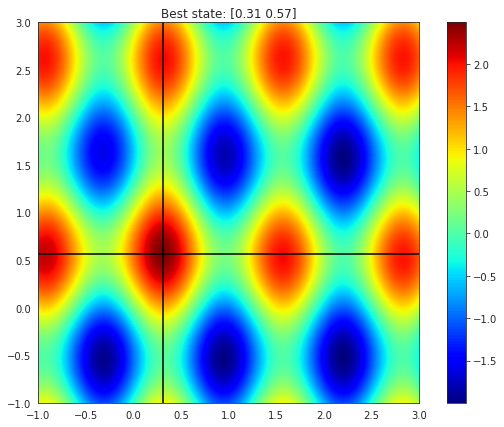

In [8]:
# libraries & dataset
from pylab import figure, cm
import seaborn as sns
import matplotlib.pyplot as plt
 
# set seaborn style
sns.set_style("white")

# lines
x1_min, x1_max  = min_max[0][0], min_max[0][1]
x2_min, x2_max = min_max[1][0], min_max[1][1]

x1, x2 = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))
y = optimise_function([x1,x2])
plt.figure(figsize = (10,7))
plt.imshow(y,extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
plt.title(f"Best state: {np.around(best_state,2)}")
plt.hlines(y = best_state[1], xmin = x1_min, xmax = x1_max)
plt.vlines(x = best_state[0], ymin = x2_min, ymax = x2_max)
plt.colorbar()
plt.show()